In [15]:
## Step 1 - Climate Analysis and Exploration - import lots of things I might need
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mp
import datetime as dt
from datetime import datetime, timedelta


import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func





In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [19]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [22]:

#Precipitation Analysis

#1 year from latest date



# Find the latest date of record
final = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"The End of Days is {final}")




The End of Days is 2017-08-23


In [80]:
#vacation dates
vacay_start_date = '2017-08-08'                                              
vacay_end_date = '2017-08-23'

In [36]:

# Date 365 days before alleged armageddon
start = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Life begins on: ", start)
# answer mentally seems a day off but that will have to be ok

Life begins on:  2016-08-23


In [37]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_dates = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()


In [75]:
#panda df
rain_df = pd.DataFrame(rain_dates)                                    
rain_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [42]:

# Sort the dataframe by date
#looking at the data, it's already sorted by date
#resetting index to date
rain_df = rain_df.set_index('date')                                      
rain_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)          
rain_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


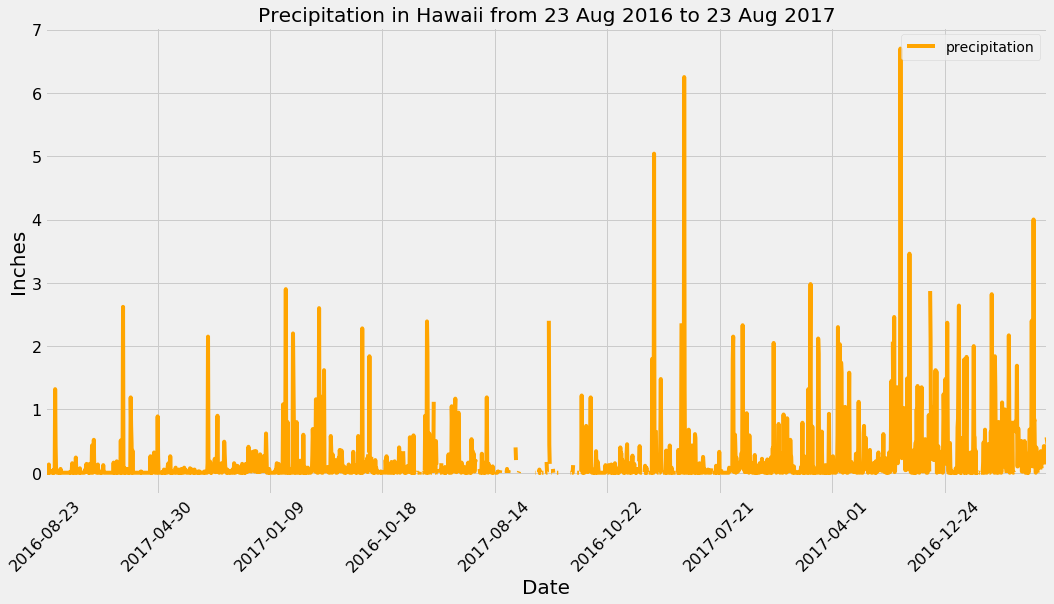

In [45]:

# Use Pandas Plotting with Matplotlib to plot the data, or just make a barchart somehow
rain_df.plot(figsize=(16, 8),                                              # plots the data
               sort_columns=True, 
               use_index=True, 
               legend=True,
               fontsize=16,
               rot=45, 
               color='orange'
               
              )
plt.title('Precipitation in Hawaii from 23 Aug 2016 to 23 Aug 2017')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Inches', fontsize=20)
plt.show()

In [49]:
#summary stats
rain_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
#Station anlysis - step 1 Design a query to calculate the total number of stations.
num_stations = session.query(func.count(Station.station)).all()[0][0]
print(f"There are {num_stations} that we know of. The Feds are clearly hiding the rest from the aliens.")


There are 9 that we know of. The Feds are clearly hiding the rest from the aliens.


In [61]:
# Design a query to find the most active stations. Do some sorting next
active_station = session.query(Measurement.station, func.count(Measurement.prcp)). \
                    group_by(Measurement.station). \
                    order_by(func.count(Measurement.prcp).desc()).all()

print(f"Station {active_station[0][0]} is most active. The ones the Feds hide are probably more active.")


Station USC00519281 is most active. The ones the Feds hide are probably more active.


In [58]:
# List the stations and observation counts in descending order.
station_action = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
station_action

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [77]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs). OK!
tobs_temp = session.query(Measurement.tobs). \
    filter(Measurement.date >=start). \
    filter(Measurement.station == active_stations[0][0]).all()
tobs_temp

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

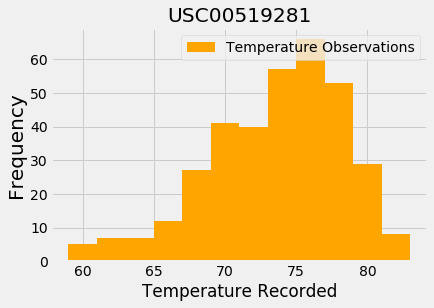

In [78]:
#plot the results as a histogram with `bins=12`

tobs = [temp[0] for temp in tobs_temp]
plt.hist(tobs, bins=12, color='orange') 
plt.title('USC00519281')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Temperature Recorded')
labels = ['Temperature Observations']
plt.legend(labels)
plt.show()

In [ ]:
#  starTheter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.
#
# Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

# Plot the min, avg, and max temperature from your previous query as a bar chart.

# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [89]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    #think TAVE should be TAVG?
    #guess not, it works
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example (sub my dates)
print(calc_temps('2016-08-08', '2016-08-23'))

[(71.0, 78.3047619047619, 83.0)]


In [104]:
#previous year from my vacation
start_date='2016-08-08'
end_date='2016-08-23'
print(calc_temps(start_date, end_date))
#feel like the answer should be fancier than this

[(71.0, 78.3047619047619, 83.0)]


In [144]:
start_date='2016-08-08'
end_date='2016-08-23'

[(tmin, tavg, tmax)] = calc_temps(start_date, end_date)


print(f"The year before I wanted to go ran from {start_date} and ends on {end_date}.")
print(f"For my trip the min temp is {tmin}.")
print(f"mean temperature is {tavg}")
print(f" max temp is {tmax}.")
print(f" GREAT TIME TO GO IN 2017 UNLESS A TYPHOON HITS")
#HA! Got it. After a mind-numbing search on the value, unpack expected 3 got 1 error I finally bothered to look at how I returned calc-temps


The year before I wanted to go ran from 2016-08-08 and ends on 2016-08-23.
For my trip the min temp is 71.0.
mean temperature is 78.3047619047619
 max temp is 83.0.
 GREAT TIME TO GO IN 2017 UNLESS A TYPHOON HITS


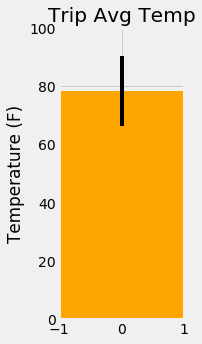

In [145]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


plt.figure(figsize=(2,5))
plt.bar(0, tavg, color="orange", width=4.0, yerr=tmax-tmin)
plt.xlim((-1, 1))
plt.ylim((0, 100))
plt.ylabel("Temperature (F)")
plt.title("Trip Avg Temp")
plt.show()



In [141]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
#from starter, seeing how it works

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
#/ Calculate the rainfall per weather station using the previous year's matching dates.

#* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

#* You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

#* Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

#* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

#* Use Pandas to plot an area plot (`stacked=False`) for the daily normals.
# had to go back to normal life, alas